# Functionality to create stackplot of the top producers of food items

In [58]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import copy

In [59]:
%run Methods.ipynb

test_prepData (__main__.TestDataPrep) ... ok
test_withNA (__main__.TestDataPrep) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.037s

OK


Read in the Agriculture Data from FAO. See basic data information. 

In [60]:
pathToData = os.path.join(os.getcwd(), "Data", "Production_Crops_Livestock_E_All_Data.csv")
agData = pd.read_csv(pathToData, encoding="latin-1")

In [61]:
agData.head(10)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,ha,NaN,NaN,NaN,...,19481.0,NaN,19793.0,NaN,20053.0,NaN,29203.0,NaN,22134.0,NaN
1,2,Afghanistan,221,"Almonds, with shell",5419,Yield,hg/ha,NaN,NaN,NaN,...,16859.0,Fc,13788.0,Fc,17161.0,Fc,13083.0,Fc,17759.0,Fc
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,NaN,NaN,NaN,...,32843.0,NaN,27291.0,NaN,34413.0,NaN,38205.0,NaN,39307.0,NaN
3,2,Afghanistan,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,NaN,M,NaN,...,24500.0,Im,26500.0,Im,25333.0,Im,25444.0,Im,25759.0,Im
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,NaN,NaN,NaN,...,7075.0,Fc,7149.0,Fc,7142.0,Fc,7123.0,Fc,7138.0,Fc
5,2,Afghanistan,711,"Anise, badian, fennel, coriander",5510,Production,tonnes,NaN,M,NaN,...,17333.0,Im,18944.0,Im,18093.0,Im,18123.0,Im,18387.0,Im
6,2,Afghanistan,515,Apples,5312,Area harvested,ha,2220.0,F,2220.0,...,19365.0,NaN,26847.0,NaN,28381.0,NaN,27559.0,NaN,25643.0,NaN
7,2,Afghanistan,515,Apples,5419,Yield,hg/ha,68018.0,Fc,68018.0,...,72762.0,Fc,63487.0,Fc,76527.0,Fc,90832.0,Fc,105626.0,Fc
8,2,Afghanistan,515,Apples,5510,Production,tonnes,15100.0,*,15100.0,...,140903.0,NaN,170443.0,NaN,217192.0,NaN,250324.0,NaN,270857.0,NaN
9,2,Afghanistan,526,Apricots,5312,Area harvested,ha,4820.0,F,4820.0,...,8595.0,NaN,18067.0,NaN,18510.0,NaN,17719.0,NaN,17481.0,NaN


In [62]:
agData.dtypes

Area Code         int64
Area             object
Item Code         int64
Item             object
Element Code      int64
                 ...   
Y2018F           object
Y2019           float64
Y2019F           object
Y2020           float64
Y2020F           object
Length: 127, dtype: object

In [63]:
agData.columns

Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Unit', 'Y1961', 'Y1961F', 'Y1962',
       ...
       'Y2016', 'Y2016F', 'Y2017', 'Y2017F', 'Y2018', 'Y2018F', 'Y2019',
       'Y2019F', 'Y2020', 'Y2020F'],
      dtype='object', length=127)

In [64]:
agData[agData['Item'] == "Beehives"]

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F
256,3,Albania,1181,Beehives,5114,Stocks,No,95100.0,NaN,92800.0,...,302962.0,NaN,289962.0,NaN,285455.0,NaN,288329.0,NaN,357984.0,NaN
599,4,Algeria,1181,Beehives,5114,Stocks,No,100000.0,*,105000.0,...,416659.0,Im,421765.0,Im,415615.0,Im,417638.0,Im,419934.0,Im
927,7,Angola,1181,Beehives,5114,Stocks,No,1000000.0,F,1000000.0,...,1157538.0,Im,1157854.0,Im,1156045.0,Im,1157065.0,Im,1158085.0,Im
1357,9,Argentina,1181,Beehives,5114,Stocks,No,650000.0,NaN,650000.0,...,2936838.0,Im,2982920.0,Im,2974045.0,Im,2978646.0,Im,2983247.0,Im
1735,1,Armenia,1181,Beehives,5114,Stocks,No,NaN,NaN,NaN,...,245396.0,NaN,237303.0,NaN,236242.0,NaN,237941.0,NaN,228152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74430,5801,Least Developed Countries,1181,Beehives,5114,Stocks,No,5001150.0,A,5009250.0,...,13306903.0,A,13726651.0,A,14311406.0,A,14209954.0,A,14212348.0,A
75050,5802,Land Locked Developing Countries,1181,Beehives,5114,Stocks,No,676350.0,A,690850.0,...,9831011.0,A,10291711.0,A,11215036.0,A,11199567.0,A,11288201.0,A
75691,5803,Small Island Developing States,1181,Beehives,5114,Stocks,No,248176.0,A,238701.0,...,429454.0,A,423217.0,A,435560.0,A,452840.0,A,471055.0,A
76207,5815,Low Income Food Deficit Countries,1181,Beehives,5114,Stocks,No,9795581.0,A,9837735.0,...,27329317.0,A,28252159.0,A,28616130.0,A,28242550.0,A,28594689.0,A


In [65]:
# See what crops there are to choose from
itemsInData = sorted(agData["Item"].unique())
print(itemsInData)

['Agave fibres nes', 'Almonds, with shell', 'Anise, badian, fennel, coriander', 'Apples', 'Apricots', 'Areca nuts', 'Artichokes', 'Asparagus', 'Asses', 'Avocados', 'Bambara beans', 'Bananas', 'Barley', 'Bastfibres, other', 'Beans, dry', 'Beans, green', 'Beef and Buffalo Meat', 'Beehives', 'Beer of barley', 'Beeswax', 'Berries nes', 'Blueberries', 'Brazil nuts, with shell', 'Broad beans, horse beans, dry', 'Buckwheat', 'Buffaloes', 'Butter and Ghee', 'Butter and ghee, sheep milk', 'Butter, buffalo milk', 'Butter, cow milk', 'Butter, goat milk', 'Cabbages and other brassicas', 'Camelids, other', 'Camels', 'Canary seed', 'Carobs', 'Carrots and turnips', 'Cashew nuts, with shell', 'Cashewapple', 'Cassava', 'Cassava leaves', 'Castor oil seed', 'Cattle', 'Cattle and Buffaloes', 'Cauliflowers and broccoli', 'Cereals nes', 'Cereals, Total', 'Cheese (All Kinds)', 'Cheese, buffalo milk', 'Cheese, goat milk', 'Cheese, sheep milk', 'Cheese, skimmed cow milk', 'Cheese, whole cow milk', 'Cherries', 

Filter data for a specific crop and use data from a specific range of years

The data includes regions rolled up into one like "Europe" and "Western Europe". On the FAO website Definitions and Standards, Area Code = Country Code, and anything with Area Code 420 and above is a region.

Get the sum, mean, median, and X highest production amounts for the crop for each year in the range

In [66]:
# Variables
agData = pd.read_csv(pathToData, encoding="latin-1")
itemsInData = sorted(agData["Item"].unique())
elementsToChooseFrom = agData["Element"].unique()
keepCols = ["Area Code", "Area", "Item", "Element", "Unit"]
fruit = "Oranges"
year1 = 2000
year2 = 2020
firstYrInData = 1961
lastYrInData = 2020
topX = 10

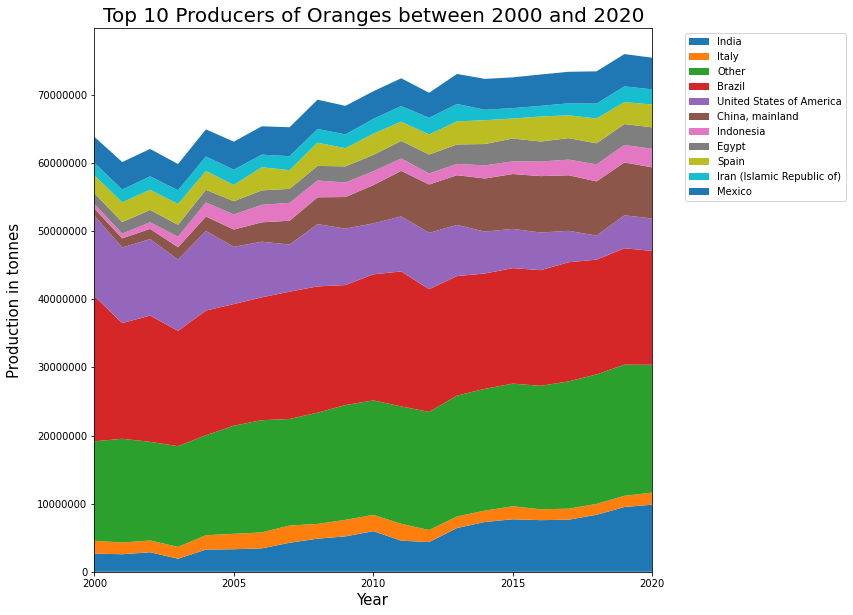

In [67]:
plotProductionCrop(agData, "Production", fruit, year1, year2, 10, stackPlot, keepCols)

The data has a rollup for China and also production for just China, mainland. Drop the China rows. 

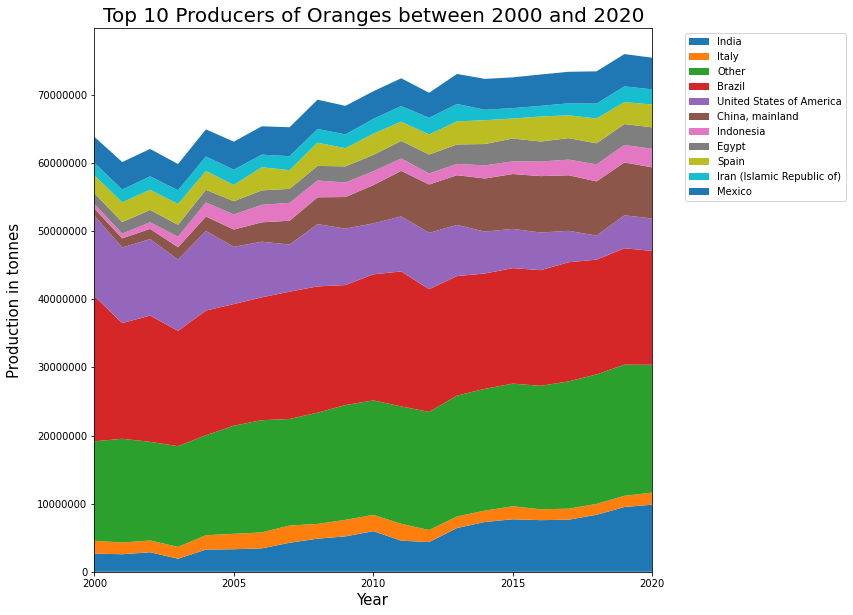

In [68]:
agData = pd.read_csv(pathToData, encoding="latin-1")
agData = agData.drop(agData[agData["Area"] == "China"].index)
plotProductionCrop(agData, "Production", fruit, year1, year2, 10, stackPlot, keepCols=keepCols)

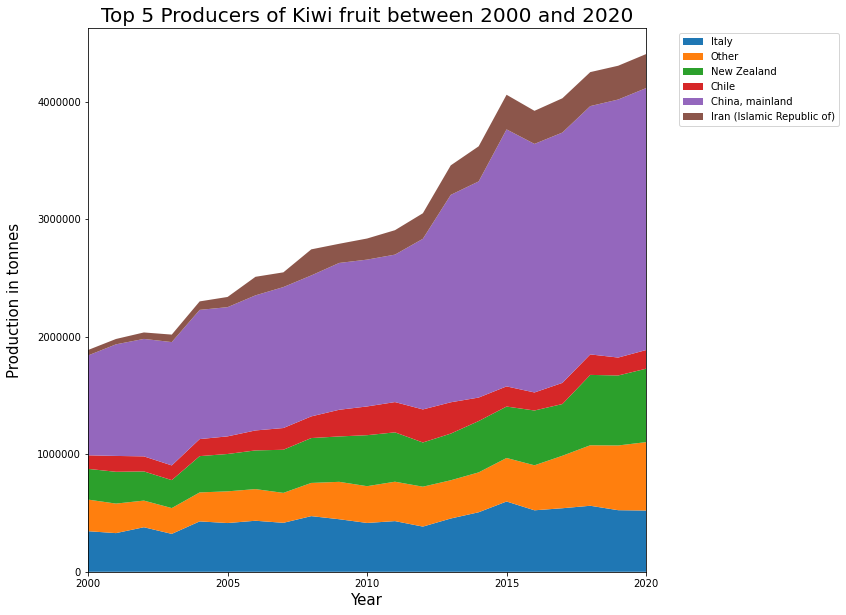

In [69]:
plotProductionCrop(agData, "Production", "Kiwi fruit", year1, year2, 5, stackPlot)

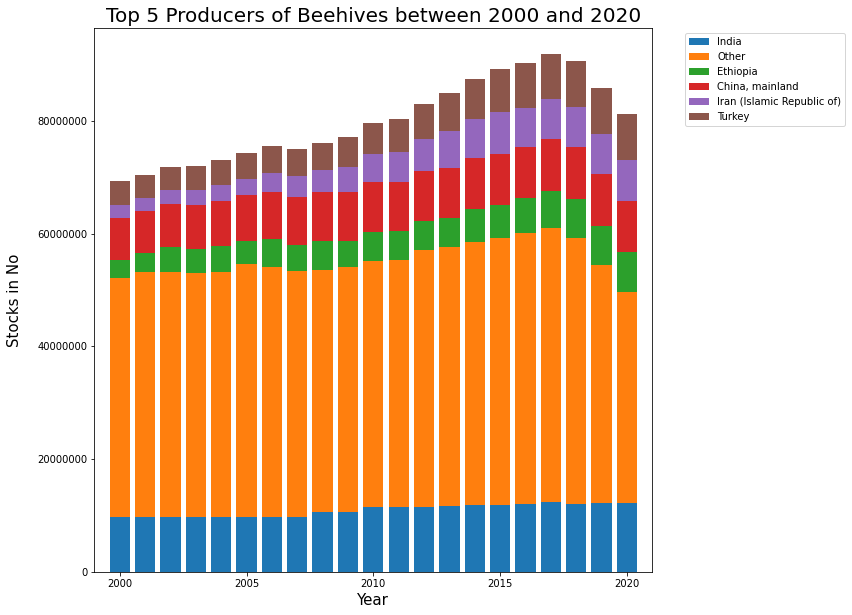

In [70]:
plotProductionCrop(agData, "Stocks", 'Beehives', year1, year2, 5, stackBarPlot, keepCols=keepCols)